![SOM image](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSiNBp6r4ej9P0hgdZqcMZHO-hUyT4RSB-98Q&usqp=CAU)

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [15]:
class SOMMER:
    def __init__(self,data,net_dim,n_iter,init_learning_rate):
        self.data=data
        self.init_learning_rate=init_learning_rate
        self.n_iter=n_iter
        self.init_radius=max(net_dim[0],net_dim[1])/2
        self.time_const=n_iter/np.log(self.init_radius)
        self.net=np.random.random((net_dim[0],net_dim[1],data.shape[1]))
    def _cal_euc(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    def normalize(self,by_col=False):
        if by_col:
            col_max=self.data.max(axis=0)
            self.data=self.data/col_max
        else:
            self.data=self.data/self.data.max()
    def _find_bmu(self,t):
        min_dist=1e+10
        for i in range(self.net.shape[0]):
            for j in range(self.net.shape[1]):
                dist=self._cal_euc(self.net[i,j],t)
                if dist < min_dist:
                    min_dist=dist
                    bmu=self.net[i,j]
                    bmu_id=np.array([i,j])
        return (bmu,bmu_id)
    def _decay_learning_rate(self,i):
        return self.init_learning_rate*np.exp(-i/self.n_iter)
    def _decay_radius(self,i):
        return self.init_radius*np.exp(-i/self.time_const)
    def _influence(self,radius,dist):
        return np.exp(-dist/(2*(radius**2)))
    def train(self):
        for k in range(self.n_iter):
            t=self.data[np.random.randint(0,self.data.shape[0]),:]
            bmu,bmu_id=self._find_bmu(t)
            l=self._decay_learning_rate(k)
            r=self._decay_radius(k)
            for i in range(self.net.shape[0]):
                for j in range(self.net.shape[1]):
                    grid_node=np.array([i,j])
                    dis=self._cal_euc(grid_node,bmu_id)
                    if dis < r:
                        infl=self._influence(r,dis)
                        w=self.net[i,j]
                        new_w=w+(l*infl*(t-w))
                        self.net[i,j]=new_w
    def plot_som(self,size=(4,4)):
        
        fig=plt.figure(figsize=size)
        ax=fig.add_subplot(111,aspect="equal")
        ax.set_xlim((0,self.net.shape[0]+1))
        ax.set_ylim((0,self.net.shape[1]+1))
        ax.set_title(f"Self Organising map {self.n_iter} Iteration")
        for x in range(1,self.net.shape[0]+1):
            for y in range(1,self.net.shape[1]+1):
               ax.add_patch(patches.Rectangle((x-0.5,y-0.5),1,1,facecolor=self.net[x-1,y-1,:],edgecolor="black"))
        plt.show()
    def _cal_u_matrix(self): 
     self.u_matrix=np.zeros((self.net.shape[0],self.net.shape[1]))
     for i in range(0,self.net.shape[0]):
        for j in range(0,self.net.shape[1]):
            sum_dist=0
            ct=0
            if i-1>=0:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i-1,j])
                ct+=1
            if i+1<=self.net.shape[0]-1:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i+1,j])
                ct+=1
            if j-1>=0:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i,j-1])
                ct+=1
            if j+1<=self.net.shape[1]-1:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i,j+1]) 
                ct+=1
            self.u_matrix[i,j]=sum_dist/ct    
     return self.u_matrix            
    def plot_umatrix(self,cmap="gray",size=(5,5)):
        """U-Matrix mean it is a grid of size as of 2D grid here each grid contains mean distance 
        of each node with neighboring node.It helps to find Outlier"""
        plt.figure(figsize=size)
        plt.imshow(self._cal_u_matrix(),cmap=cmap)

#### Create Random RGB colors

In [23]:

data=np.random.randint(0,256,(200,3))

In [24]:
som=SOMMER(data,net_dim=(8,8),n_iter=3000,init_learning_rate=0.01)

In [25]:
som.normalize()


In [26]:
som.train()

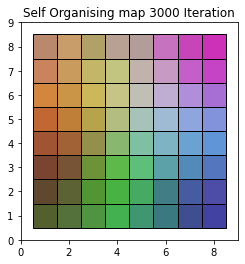

In [27]:
som.plot_som()

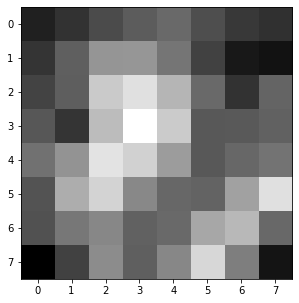

In [28]:
som.plot_umatrix(cmap="gray")

## For Iris Dataset

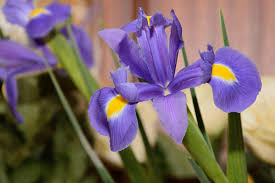

In [29]:
import seaborn as sns
iris=sns.load_dataset("iris")

In [30]:
data=iris.iloc[:,:-1].values

In [31]:
som=SOMMER(data,net_dim=(8,8),n_iter=3000,init_learning_rate=0.01)

In [32]:
som.normalize(by_col=True)

In [33]:
som.train()

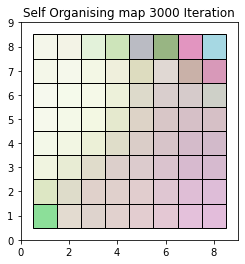

In [34]:
som.plot_som()

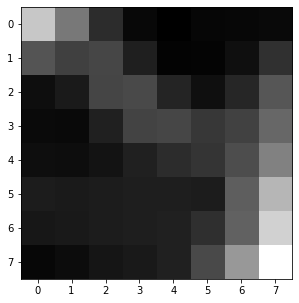

In [35]:
som.plot_umatrix()